<img src="../img/viu_logo.png" width="200">

## 04EPPY - Actividad 2

25% de la Nota Final

### Fecha Entrega
- Convocatoria 1 - 31/03/2022
- Convocatoria 2 - 07/04/2022

### Instrucciones:
- Crear un notebook de Python3 que servirá como entrega de la actividad.
- Separar bien los apartados propuestos con celdas Markdown.
- Mantener una estructura limpia, comentando código y secuenciando los apartados con el código correspondiente que resuelva la actividad.
- Como criterio de evaluación se tendrá en cuenta el resultado, la consecución del mismo, estilo, comentarios y adecuación.
- No está permitido compartir los resultados ni el código en ninguno de los foros.

### Entrega:
- Un solo documento en formato notebook: .ipynb
- Para hacer la entrega hay que subir el notebook al repositorio en la actividad de blackboard.

# Olympics

### A1 - Leer Datasets - 10%
- En Kaggle existen dos datasets sobre las olimpiadas modernas
  - Atletas y resultados de medallas, desde 1896 a 2016, https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results
  - Resultados de atletismo, desde 1896 a 2016, https://www.kaggle.com/jayrav13/olympic-track-field-results
  
- Obtener y leer los ficheros csv en dataframes de pandas

#### Instalar paquete de API de Kaggle

In [2]:
pip install kaggle

In [2]:
#Importar paquetes para usar en la actividad
import numpy as np
import pandas as pd
import zipfile as zp
import os

In [27]:
#Autenticacion con Kaggle API
os.environ['KAGGLE_USERNAME'] = "jmejiasb"
os.environ['KAGGLE_KEY'] = "782634d4517fd0263297f09bf847ecad"

from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()

In [40]:
#Descargar zip de archivos con API de Kaggle
#Para descargar usando el Kaggle API se debe usar el link del dataset (la url de kaggle despues de "www.kaggle.com/") y la ruta donde guardar el archivo zip
route = os.path.join("res")
api.dataset_download_files("heesoo37/120-years-of-olympic-history-athletes-and-results", path = route)
api.dataset_download_files("jayrav13/olympic-track-field-results", path = route)

In [42]:
#Extraer archivos zip de los dataset en su respectiva carpeta

#120 years of olympic history: athletes and results
with zp.ZipFile("res/120-years-of-olympic-history-athletes-and-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","120_years_olympic_history")) 
    print('Done!')
    
#Olympic track field results
with zp.ZipFile("res/olympic-track-field-results.zip") as zipp:
    print('Extracting all files...') 
    zipp.extractall(os.path.join("res","olympic-track-field-results")) 
    print('Done!')

Extracting all files...
Done!
Extracting all files...
Done!


In [3]:
#Guardar csv en su respectivo DataFrame

#120 years of olympic history: athletes and result
olympic_history_route = os.path.join("res","120_years_olympic_history","athlete_events.csv")


olympic_history = pd.read_csv(olympic_history_route, engine="python", header=0)

olympic_history.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
175024,87936,Pierre Ochs,M,25.0,171.0,72.0,France,FRA,2010 Winter,2010,Winter,Vancouver,Freestyle Skiing,Freestyle Skiing Men's Moguls,NaN
1835,1015,Conrad Adriaenssens,M,49.0,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Shooting,"Shooting Men's Military Rifle, Prone, 300 metr...",NaN
261051,130636,Madeleine Williams,F,26.0,163.0,55.0,Canada,CAN,2010 Winter,2010,Winter,Vancouver,Cross Country Skiing,Cross Country Skiing Women's 4 x 5 kilometres ...,NaN
35015,18040,Joaqun Capilla Prez,M,19.0,168.0,NaN,Mexico,MEX,1948 Summer,1948,Summer,London,Diving,Diving Men's Platform,Bronze
243436,121918,Pavel Sergeyevich Trikhichev,M,21.0,177.0,74.0,Russia,RUS,2014 Winter,2014,Winter,Sochi,Alpine Skiing,Alpine Skiing Men's Super G,NaN


In [4]:
#Track field results
olympic_track_field_route = os.path.join("res","olympic-track-field-results","results.csv")

#Al intentar leer el csv lanza error ya que algunos valores de la columna "Results" tienen una coma de mas (ie. ",+0.1") y lo toma como una nueva columna
olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0) #ParserError

In [5]:
#Para resolver este error se usa el parametro "usecols" para que solo tome en cuenta las primeras 8 columnas.
olympic_track_field = pd.read_csv(olympic_track_field_route, engine="python", header=0, usecols=range(8))

olympic_track_field.sample(5)

,Gender,Event,Location,Year,Medal,Name,Nationality,Result
309,M,1500M Men,Athens,1896,G,Edwin FLACK,AUS,4:33.2
680,M,4X100M Relay Men,Montreal,1976,S,NaN,GDR,38.66
1237,M,High Jump Men,Athens,2004,B,Jaroslav BABA,CZE,2.34
542,M,400M Hurdles Men,Amsterdam,1928,B,Morgan TAYLOR,USA,53.6
1848,W,3000M Steeplechase Women,Beijing,2008,G,Gulnara SAMITOVA,RUS,8:58.81


### A2 - Análisis - 45%
- Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes
![sports_per_year](res/sports_per_year.png)
- Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo
![sex](res/sex.png)
- Gráfico con los 50 paises con más medallas en toda la historia, en cada barra el nombre completo del pais, longitud de cada barra, total de medallas obtenidas por pais
![medallero](res/medallero.png)

In [7]:
#A partir de 1992 los juegos olimpicos de invierno se hacen con dos años de diferencia. 
#Para que todo el grafico quede en intervalos de 4 años, se hace una list comprehension para cambiar estos años de juegos de invierno a los años de los juegos de verano
olympic_history["Year"] = [x+2 if x % 4 != 0 else x for x in olympic_history["Year"]]

olympic_history.sample(5)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
60728,31101,Hanna Leonidivna Dzerkal,F,24.0,172.0,57.0,Ukraine,UKR,2012 Summer,2012,Summer,London,Swimming,Swimming Women's 200 metres Breaststroke,NaN
109102,55171,Emma Karolina Johansson,F,28.0,168.0,54.0,Sweden,SWE,2012 Summer,2012,Summer,London,Cycling,"Cycling Women's Road Race, Individual",NaN
50452,25955,Anne Catherine Jeanne Ghislain de Borman (de S...,F,39.0,NaN,NaN,Belgium,BEL,1920 Summer,1920,Summer,Antwerpen,Tennis,Tennis Women's Singles,NaN
216581,108744,Eino Seppl,M,27.0,177.0,65.0,Finland,FIN,1924 Summer,1924,Summer,Paris,Athletics,"Athletics Men's 5,000 metres",NaN
211869,106382,Neville Merwyn Sayers,M,29.0,177.0,71.0,Australia,AUS,1956 Summer,1956,Summer,Melbourne,Modern Pentathlon,Modern Pentathlon Men's Individual,NaN


#### - Obtener un gráfico de barras con la evolución del número de deportes por año, eje X años, eje Y número de deportes

In [10]:
#Filtrar el numero de deportes y el año en que se hizo, debido a que cada deporte tiene varios eventos se eliminan los duplicados
sports_per_year = olympic_history[["Year","Sport"]].drop_duplicates()

sports_per_year.head(5)

,Year,Sport
0,1992,Basketball
1,2012,Judo
2,1920,Football
3,1900,Tug-Of-War
4,1988,Speed Skating


In [11]:
#Se agrupa por año y se usa el metodo count() para saber el numero de deportes por año
sports_per_year = sports_per_year.groupby("Year", as_index=False).count()

sports_per_year.head(5)

,Year,Sport
0,1896,9
1,1900,20
2,1904,18
3,1908,25
4,1912,17


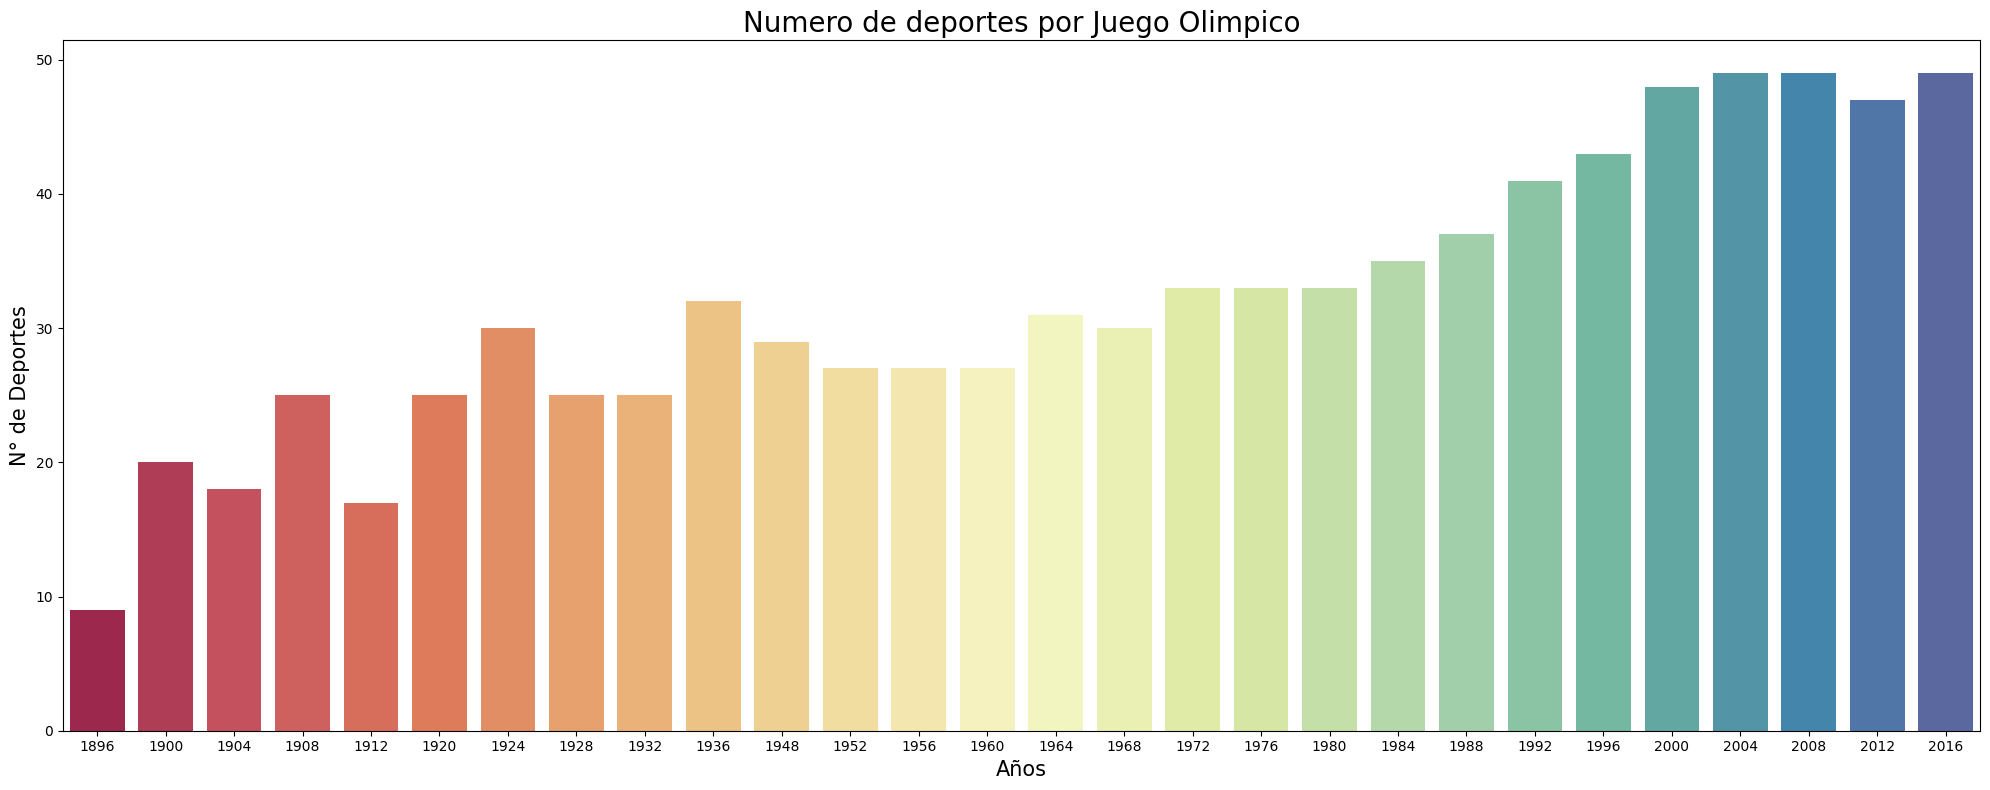

In [12]:
#Crear grafico de barras
import matplotlib.pyplot as plt
import seaborn as sns

sport_per_year_plot = sns.barplot(data=sports_per_year, x=sports_per_year["Year"], y=sports_per_year["Sport"], palette="Spectral")

#Modificar parametros del grafico para hacerlo mas presentable
sport_per_year_plot.figure.set_figwidth(20)
sport_per_year_plot.figure.set_figheight(8)
sport_per_year_plot.set_title("Numero de deportes por Juego Olimpico", fontsize=20)
sport_per_year_plot.set_xlabel("Años", fontsize=15)
sport_per_year_plot.set_ylabel("N° de Deportes", fontsize=15)
plt.tight_layout()

#Mostrar grafico
plt.show()


#### - Gráfico con la evolución de la participación femenina en las olimpiadas a lo largo de la historia, eje X años, eje Y número de atletas, para cada año una barra para cada sexo 

In [43]:
#Filtrar el nombre, año y sexo de cada participante
women_per_year = olympic_history[["Sex","Year"]].groupby(["Sex", "Year"], as_index=False).count("Name")

display(women_per_year)

TypeError: GroupBy.count() takes 1 positional argument but 2 were given

In [38]:
#Agrupar por sexo y año. Contar cuantos participantes hay de cada sexo
women_per_year = women_per_year.groupby([["Year"],["Sex"]], as_index=False).count()

women_per_year.sample(5)

AttributeError: 'DataFrameGroupBy' object has no attribute 'groupby'

### A3 - Machine Learning - 45%

- Crear un modelo capaz de predecir el tiempo que va a hacer un atleta en la prueba de los 100 metros lisos, en función de su edad, sexo, peso y altura.
![model](res/model.png)